# Chapter 5 판다스 입문

## 제 2절 Series와 DataFrame

## 1. Series 

### (1) 시리즈 이해 

### (2) 시리즈 생성하기 

In [24]:
import numpy as np
import pandas as pd

In [25]:
stock_list = pd.Series([55000, 80000, 20000],
              index=["삼성전자", "하이닉스", "카카오뱅크"])
stock_list

삼성전자     55000
하이닉스     80000
카카오뱅크    20000
dtype: int64

### (3) 시리즈 구성 확인하기 

In [26]:
print(stock_list.index)
stock_list

Index(['삼성전자', '하이닉스', '카카오뱅크'], dtype='object')


삼성전자     55000
하이닉스     80000
카카오뱅크    20000
dtype: int64

In [27]:
print(stock_list.values)

[55000 80000 20000]


### 4) 시리즈 이름 지정 

In [28]:
stock_list.index.name = "기업명"
stock_list.name = '주가'
stock_list

기업명
삼성전자     55000
하이닉스     80000
카카오뱅크    20000
Name: 주가, dtype: int64

### 5) Series를  DataFrame으로 변환 가능 

In [29]:
stock_list.to_frame()

,주가
기업명,
삼성전자,55000
하이닉스,80000
카카오뱅크,20000


In [30]:
df = pd.DataFrame(stock_list)
df

,주가
기업명,
삼성전자,55000
하이닉스,80000
카카오뱅크,20000


In [31]:
df = pd.DataFrame([stock_list])
df

기업명,삼성전자,하이닉스,카카오뱅크
주가,55000,80000,20000


### (6) [연습] 시리즈 만들기

In [32]:
from pandas import Series, DataFrame
import pandas as pd
fruit = Series([2500,3800,1200,6000],index=['apple','banana','peer','cherry'])
print(fruit)

apple     2500
banana    3800
peer      1200
cherry    6000
dtype: int64


In [33]:
from pandas import Series, DataFrame
abc = Series([600, 590, 570, 550, 570])
print(abc)

0    600
1    590
2    570
3    550
4    570
dtype: int64


In [34]:
print(abc[1])
print(abc[4])

590
570


In [35]:
abc1 = Series([600, 590, 570, 550, 570], index=['2023-05-19',
                                                            '2023-05-18',
                                                            '2023-05-17',
                                                            '2023-05-16',
                                                            '2023-05-15'])
print(abc1)

2023-05-19    600
2023-05-18    590
2023-05-17    570
2023-05-16    550
2023-05-15    570
dtype: int64


In [36]:
print(abc1['2023-05-16'])

550


In [37]:
for date in abc1.index:
    print(date)

for ending_price in abc1.values:
    print(ending_price)

2023-05-19
2023-05-18
2023-05-17
2023-05-16
2023-05-15
600
590
570
550
570


### (7) 시리즈의 기초 통계 메서드 사용하기 

In [38]:
print(stock_list.describe())

count        3.000000
mean     51666.666667
std      30138.568867
min      20000.000000
25%      37500.000000
50%      55000.000000
75%      67500.000000
max      80000.000000
Name: 주가, dtype: float64


In [39]:
print(stock_list.mean())

51666.666666666664


In [40]:
print(stock_list.std())

30138.56886670854


In [41]:
print(abc.describe())

count      5.000000
mean     576.000000
std       19.493589
min      550.000000
25%      570.000000
50%      570.000000
75%      590.000000
max      600.000000
dtype: float64


## 2. Pandas DataFrame

### (1) 데이터프레임 생성

In [42]:
from pandas import Series, DataFrame

raw_data = {'col0': [1, 2, 3, 4, 5],
            'col1': [10, 20, 30, 40, 50],
            'col2': [100, 200, 300, 400, 500]}

data = DataFrame(raw_data)
print(data)

   col0  col1  col2
0     1    10   100
1     2    20   200
2     3    30   300
3     4    40   400
4     5    50   500


In [43]:
from pandas import Series, DataFrame

abcd = {'open':  [11650, 11100, 11200, 11100, 11000],
           'high':  [12100, 11800, 11200, 11100, 11150],
           'low' :  [11600, 11050, 10900, 10950, 10900],
           'close': [11900, 11600, 11000, 11100, 11050]}

abcd_day = DataFrame(abcd)
print(abcd_day)

    open   high    low  close
0  11650  12100  11600  11900
1  11100  11800  11050  11600
2  11200  11200  10900  11000
3  11100  11100  10950  11100
4  11000  11150  10900  11050


In [44]:
type(abcd_day)

pandas.core.frame.DataFrame

In [45]:
# 책 기준 108page 코드 추가 print(abcd_day) 
date = ['2023.02.29', '2023.02.26', '2023.02.25', '2023.02.24', '2023.02.23']
abcd_day = DataFrame(abcd, columns=['open', 'high', 'low', 'close'], index=date)
print(abcd_day)

             open   high    low  close
2023.02.29  11650  12100  11600  11900
2023.02.26  11100  11800  11050  11600
2023.02.25  11200  11200  10900  11000
2023.02.24  11100  11100  10950  11100
2023.02.23  11000  11150  10900  11050


### (2) DataFrame 로우(인덱스) ,칼럼 선택

In [101]:
close = abcd_day['close']
print(close)

2023.02.29    11900
2023.02.26    11600
2023.02.25    11000
2023.02.24    11100
2023.02.23    11050
Name: close, dtype: int64


In [102]:
day_date = abcd_day.loc['2023.02.26']
print(day_date)
print(type(day_date))

open     11100
high     11800
low      11050
close    11600
Name: 2023.02.26, dtype: int64
<class 'pandas.core.series.Series'>


In [103]:
print(abcd_day.columns)
print(abcd_day.index)

Index(['open', 'high', 'low', 'close'], dtype='object')
Index(['2023.02.29', '2023.02.26', '2023.02.25', '2023.02.24', '2023.02.23'], dtype='object')


## 3. 텍스트 파일 만들기 

### (1) %%writefile

In [104]:
import pandas as pd

In [105]:
%%writefile stock_list.csv
삼성, 현대차, 네이버
1, 100, 200, 150
2, 110, 210, 220
3, 120, 220, 200

Overwriting stock_list.csv


### (2) csv 파일 불러오기 

In [106]:
pd.read_csv('stock_list.csv')

,삼성,현대차,네이버
1,100,200,150
2,110,210,220
3,120,220,200


### (3) csv 파일을 df로 

In [107]:
df = pd.read_csv('stock_list.csv')
df

,삼성,현대차,네이버
1,100,200,150
2,110,210,220
3,120,220,200


### (4) csv파일 저장하기 

In [53]:
df.to_csv('stock_list')

### (5) 파일 불러오기

In [54]:
df = pd.read_csv("./stock_list.csv")
df.head()

,삼성,현대차,네이버
1,100,200,150
2,110,210,220
3,120,220,200


### (6) 웹 상의 CSV 파일 입력

In [108]:
df = pd.read_csv("https://raw.githubusercontent.com/datascienceschool/docker_rpython/master/data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 제3절 주식 데이터 받기 

## 1. FinanceDataReader을 이용한 분석
#### https://pandas-datareader.readthedocs.io/en/latest/readers/index.html¶

### (1) finance-datareader 설치

In [56]:
!pip install finance-datareader


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [110]:
import pandas as pd
import numpy as np

### (2) 한국거래소 상장종목 전체 가져오기

In [111]:
import FinanceDataReader as fdr

fdr.__version__

'0.9.66'

In [112]:
data_krx = fdr.StockListing('KRX')
data_nasdaq = fdr.StockListing('NASDAQ')

100%|████████████████████████████████████████████████████████████████████████████| 3870/3870 [00:03<00:00, 1104.03it/s]


In [113]:
data_krx.shape

(2792, 17)

In [114]:
data_krx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2792 entries, 0 to 2791
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Code         2792 non-null   object 
 1   ISU_CD       2792 non-null   object 
 2   Name         2792 non-null   object 
 3   Market       2792 non-null   object 
 4   Dept         2792 non-null   object 
 5   Close        2792 non-null   object 
 6   ChangeCode   2792 non-null   object 
 7   Changes      2792 non-null   int64  
 8   ChagesRatio  2792 non-null   float64
 9   Open         2792 non-null   int64  
 10  High         2792 non-null   int64  
 11  Low          2792 non-null   int64  
 12  Volume       2792 non-null   int64  
 13  Amount       2792 non-null   int64  
 14  Marcap       2792 non-null   int64  
 15  Stocks       2792 non-null   int64  
 16  MarketId     2792 non-null   object 
dtypes: float64(1), int64(8), object(8)
memory usage: 370.9+ KB


In [119]:
data_krx.describe()

,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks
count,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2.792000e+03,2.792000e+03,2.792000e+03,2.792000e+03
mean,-66.318410,-0.099359,20304.113539,20609.949140,19928.150072,4.718651e+05,4.854557e+09,9.193466e+11,4.163604e+07
std,1383.161957,2.943871,51549.737428,52159.880124,50416.802150,3.386498e+06,2.338803e+10,9.187198e+12,1.324641e+08
min,-22000.000000,-16.580000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,8.835945e+08,2.000000e+05
25%,-90.000000,-1.110000,2482.500000,2533.750000,2425.000000,1.024275e+04,5.328646e+07,5.719110e+10,1.019038e+07
50%,-10.000000,-0.290000,6320.000000,6435.000000,6220.000000,4.000550e+04,2.369516e+08,1.166172e+11,1.993337e+07
75%,10.000000,0.290000,16105.000000,16442.500000,15902.500000,1.540030e+05,1.506852e+09,2.951678e+11,4.165862e+07
max,30500.000000,29.970000,889000.000000,889000.000000,852000.000000,1.174063e+08,5.355266e+11,4.351971e+14,5.969783e+09


In [120]:
data_krx.columns

Index(['Code', 'ISU_CD', 'Name', 'Market', 'Dept', 'Close', 'ChangeCode',
       'Changes', 'ChagesRatio', 'Open', 'High', 'Low', 'Volume', 'Amount',
       'Marcap', 'Stocks', 'MarketId'],
      dtype='object')

In [121]:
data_krx

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,72900,2,-900,-1.22,73700,73700,72800,7315335,535526578400,435197147895000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,147600,2,-3700,-2.45,150300,151100,147500,1638257,244440332600,107453149074000,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,400000,1,2500,0.63,397500,401000,392000,82164,32620301000,93600000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,816000,2,-5000,-0.61,819000,824000,815000,31592,25880499000,58077984000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,62300,2,-200,-0.32,62800,62800,62200,417486,26093188100,51265841410000,822886700,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2787,217320,KR7217320001,썬테크,KONEX,일반기업부,2990,0,0,0.00,0,0,0,0,0,3139500000,1050000,KNX
2788,288490,KR7288490006,나라소프트,KONEX,일반기업부,50,3,0,0.00,52,52,46,49785,2359871,2620736600,52414732,KNX
2789,245450,KR7245450002,씨앤에스링크,KONEX,일반기업부,1300,2,-100,-7.14,1190,1300,1190,551,655800,2053948000,1579960,KNX
2790,308700,KR7308700004,테크엔,KONEX,일반기업부,430,3,0,0.00,494,494,430,502,217524,1720000000,4000000,KNX


In [123]:
data_krx.to_csv('krx_data.csv')
pd.read_csv('krx_data.csv')

,Unnamed: 0,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,0,005930,KR7005930003,삼성전자,KOSPI,NaN,72900,2,-900,-1.22,73700,73700,72800,7315335,535526578400,435197147895000,5969782550,STK
1,1,000660,KR7000660001,SK하이닉스,KOSPI,NaN,147600,2,-3700,-2.45,150300,151100,147500,1638257,244440332600,107453149074000,728002365,STK
2,2,373220,KR7373220003,LG에너지솔루션,KOSPI,NaN,400000,1,2500,0.63,397500,401000,392000,82164,32620301000,93600000000000,234000000,STK
3,3,207940,KR7207940008,삼성바이오로직스,KOSPI,NaN,816000,2,-5000,-0.61,819000,824000,815000,31592,25880499000,58077984000000,71174000,STK
4,4,005935,KR7005931001,삼성전자우,KOSPI,NaN,62300,2,-200,-0.32,62800,62800,62200,417486,26093188100,51265841410000,822886700,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2787,2787,217320,KR7217320001,썬테크,KONEX,일반기업부,2990,0,0,0.00,0,0,0,0,0,3139500000,1050000,KNX
2788,2788,288490,KR7288490006,나라소프트,KONEX,일반기업부,50,3,0,0.00,52,52,46,49785,2359871,2620736600,52414732,KNX
2789,2789,245450,KR7245450002,씨앤에스링크,KONEX,일반기업부,1300,2,-100,-7.14,1190,1300,1190,551,655800,2053948000,1579960,KNX
2790,2790,308700,KR7308700004,테크엔,KONEX,일반기업부,430,3,0,0.00,494,494,430,502,217524,1720000000,4000000,KNX


In [124]:
data_krx.to_csv('krx_data.csv', encoding="utf-8-sig")
pd.read_csv('krx_data.csv')

,Unnamed: 0,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,0,005930,KR7005930003,삼성전자,KOSPI,NaN,72900,2,-900,-1.22,73700,73700,72800,7315335,535526578400,435197147895000,5969782550,STK
1,1,000660,KR7000660001,SK하이닉스,KOSPI,NaN,147600,2,-3700,-2.45,150300,151100,147500,1638257,244440332600,107453149074000,728002365,STK
2,2,373220,KR7373220003,LG에너지솔루션,KOSPI,NaN,400000,1,2500,0.63,397500,401000,392000,82164,32620301000,93600000000000,234000000,STK
3,3,207940,KR7207940008,삼성바이오로직스,KOSPI,NaN,816000,2,-5000,-0.61,819000,824000,815000,31592,25880499000,58077984000000,71174000,STK
4,4,005935,KR7005931001,삼성전자우,KOSPI,NaN,62300,2,-200,-0.32,62800,62800,62200,417486,26093188100,51265841410000,822886700,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2787,2787,217320,KR7217320001,썬테크,KONEX,일반기업부,2990,0,0,0.00,0,0,0,0,0,3139500000,1050000,KNX
2788,2788,288490,KR7288490006,나라소프트,KONEX,일반기업부,50,3,0,0.00,52,52,46,49785,2359871,2620736600,52414732,KNX
2789,2789,245450,KR7245450002,씨앤에스링크,KONEX,일반기업부,1300,2,-100,-7.14,1190,1300,1190,551,655800,2053948000,1579960,KNX
2790,2790,308700,KR7308700004,테크엔,KONEX,일반기업부,430,3,0,0.00,494,494,430,502,217524,1720000000,4000000,KNX


In [125]:
data_krx['Name']

0           삼성전자
1         SK하이닉스
2       LG에너지솔루션
3       삼성바이오로직스
4          삼성전자우
          ...   
2787         썬테크
2788       나라소프트
2789      씨앤에스링크
2790         테크엔
2791          베른
Name: Name, Length: 2792, dtype: object

In [126]:
data_krx.loc[0]

Code                    005930
ISU_CD            KR7005930003
Name                      삼성전자
Market                   KOSPI
Dept                          
Close                    72900
ChangeCode                   2
Changes                   -900
ChagesRatio              -1.22
Open                     73700
High                     73700
Low                      72800
Volume                 7315335
Amount            535526578400
Marcap         435197147895000
Stocks              5969782550
MarketId                   STK
Name: 0, dtype: object

In [127]:
type(data_krx.loc[0])

pandas.core.series.Series

In [128]:
data_krx[['Name','Market']]

,Name,Market
0,삼성전자,KOSPI
1,SK하이닉스,KOSPI
2,LG에너지솔루션,KOSPI
3,삼성바이오로직스,KOSPI
4,삼성전자우,KOSPI
...,...,...
2787,썬테크,KONEX
2788,나라소프트,KONEX
2789,씨앤에스링크,KONEX
2790,테크엔,KONEX


In [129]:
data_krx.loc[[0,3,5,7]]

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,72900,2,-900,-1.22,73700,73700,72800,7315335,535526578400,435197147895000,5969782550,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,816000,2,-5000,-0.61,819000,824000,815000,31592,25880499000,58077984000000,71174000,STK
5,005380,KR7005380001,현대차,KOSPI,,241000,2,-11500,-4.55,250000,253000,241000,1114210,274081671000,50979092946000,211531506,STK
7,068270,KR7068270008,셀트리온,KOSPI,,180300,2,-2100,-1.15,182500,183000,180200,220724,39980025900,39314372088600,218049762,STK


### (3) 검색

In [130]:
import FinanceDataReader as fdr
import datetime
start = datetime.datetime(2022, 1, 3)
end = datetime.datetime(2022, 9, 1)


In [131]:
sm = fdr.DataReader("005930", start, end)
sm

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205
...,...,...,...,...,...,...
2022-08-26,60300,60900,59900,60000,9499995,0.005025
2022-08-29,58700,58900,58600,58600,9841329,-0.023333
2022-08-30,58700,59000,58300,58800,9690044,0.003413


In [134]:
sm = fdr.DataReader("005930", "2022-01-03", "2022-09-01")
sm


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205
...,...,...,...,...,...,...
2022-08-26,60300,60900,59900,60000,9499995,0.005025
2022-08-29,58700,58900,58600,58600,9841329,-0.023333
2022-08-30,58700,59000,58300,58800,9690044,0.003413


In [135]:
sm = fdr.DataReader("005930", "2022-1-3", "2023-9-1")
sm

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205
...,...,...,...,...,...,...
2023-08-28,66800,67000,66500,66800,5824628,-0.004471
2023-08-29,66900,67200,66600,66800,9114352,0.000000
2023-08-30,67300,67700,67100,67100,9181223,0.004491


## 2. 데이터를 시각적으로 표현

In [76]:
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2023, 1, 3)
end = datetime.datetime(2023, 5, 1)
sm = fdr.DataReader("005930", start, end)

In [77]:
sm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81 entries, 2023-01-03 to 2023-04-28
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    81 non-null     int64  
 1   High    81 non-null     int64  
 2   Low     81 non-null     int64  
 3   Close   81 non-null     int64  
 4   Volume  81 non-null     int64  
 5   Change  81 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 4.4 KB


In [78]:
pip install matplotlib


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: c:\users\operator-70\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip


In [79]:
import matplotlib.pyplot as plt

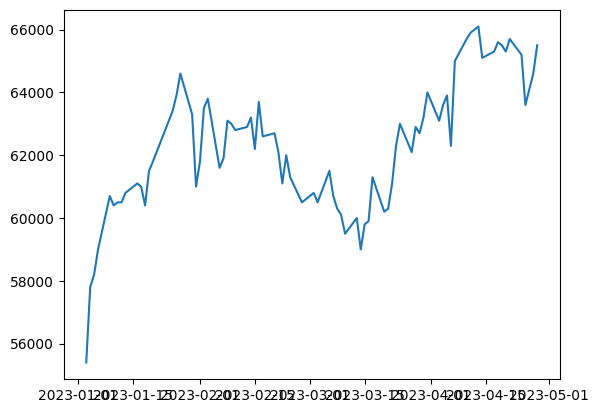

In [80]:
plt.plot(sm['Close'])

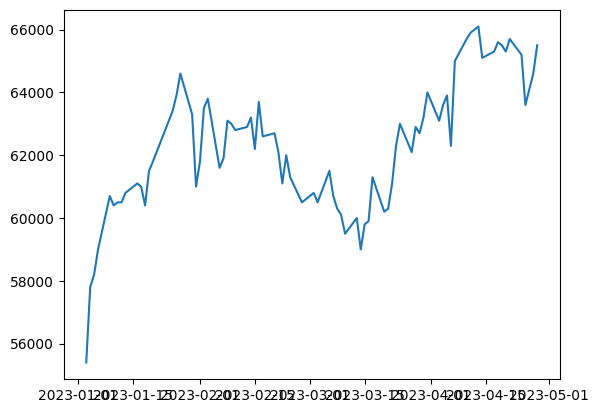

In [81]:
plt.plot(sm['Close'])
plt.show()

## 3. 기술적 분석지표로 이동평균선

In [136]:
import pandas as pd
import FinanceDataReader as fdr
sm = fdr.DataReader("005930", "2022-01-03", "2022-09-01")
sm

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205
...,...,...,...,...,...,...
2022-08-26,60300,60900,59900,60000,9499995,0.005025
2022-08-29,58700,58900,58600,58600,9841329,-0.023333
2022-08-30,58700,59000,58300,58800,9690044,0.003413


In [83]:
sm.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-04-24,65300,65700,64800,65200,12986581,-0.007610
2023-04-25,65300,65400,63400,63600,16193271,-0.024540
2023-04-26,63600,64300,63300,64100,12664541,0.007862
2023-04-27,64100,65000,63300,64600,14779601,0.007800
2023-04-28,65200,65900,65000,65500,19699481,0.013932


In [84]:
sm.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-01-03,55400,56000,54500,55400,13547030,-0.001802
2023-01-04,55700,58000,55600,57800,20188071,0.043321
2023-01-05,58200,58800,57600,58200,15682826,0.006920
2023-01-06,58300,59400,57900,59000,17334989,0.013746
2023-01-09,59700,60700,59600,60700,18640107,0.028814


In [85]:
ma5 = sm['Close'].rolling(window=5).mean()

In [86]:
type(ma5)

pandas.core.series.Series

In [87]:
ma5

Date
2023-01-03        NaN
2023-01-04        NaN
2023-01-05        NaN
2023-01-06        NaN
2023-01-09    58220.0
               ...   
2023-04-24    65460.0
2023-04-25    65060.0
2023-04-26    64780.0
2023-04-27    64640.0
2023-04-28    64600.0
Name: Close, Length: 81, dtype: float64

In [88]:
ma5.tail(10)

Date
2023-04-17    65680.0
2023-04-18    65620.0
2023-04-19    65520.0
2023-04-20    65360.0
2023-04-21    65480.0
2023-04-24    65460.0
2023-04-25    65060.0
2023-04-26    64780.0
2023-04-27    64640.0
2023-04-28    64600.0
Name: Close, dtype: float64

In [89]:
sm['Volume'] != 0

Date
2023-01-03    True
2023-01-04    True
2023-01-05    True
2023-01-06    True
2023-01-09    True
              ... 
2023-04-24    True
2023-04-25    True
2023-04-26    True
2023-04-27    True
2023-04-28    True
Name: Volume, Length: 81, dtype: bool

In [90]:
new_sm = sm[sm['Volume'] !=0]
new_sm.tail(5)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-04-24,65300,65700,64800,65200,12986581,-0.007610
2023-04-25,65300,65400,63400,63600,16193271,-0.024540
2023-04-26,63600,64300,63300,64100,12664541,0.007862
2023-04-27,64100,65000,63300,64600,14779601,0.007800
2023-04-28,65200,65900,65000,65500,19699481,0.013932


In [91]:
MA5 = new_sm['Close'].rolling(window=5).mean()
MA5.tail(10)

Date
2023-04-17    65680.0
2023-04-18    65620.0
2023-04-19    65520.0
2023-04-20    65360.0
2023-04-21    65480.0
2023-04-24    65460.0
2023-04-25    65060.0
2023-04-26    64780.0
2023-04-27    64640.0
2023-04-28    64600.0
Name: Close, dtype: float64

In [92]:
MA5 =  new_sm['Close'].rolling(window=5).mean()
new_sm.insert(len(new_sm.columns), "MA5", ma5)
new_sm.tail(5)

,Open,High,Low,Close,Volume,Change,MA5
Date,,,,,,,
2023-04-24,65300,65700,64800,65200,12986581,-0.007610,65460.0
2023-04-25,65300,65400,63400,63600,16193271,-0.024540,65060.0
2023-04-26,63600,64300,63300,64100,12664541,0.007862,64780.0
2023-04-27,64100,65000,63300,64600,14779601,0.007800,64640.0
2023-04-28,65200,65900,65000,65500,19699481,0.013932,64600.0


In [93]:
ma20 = new_sm['Close'].rolling(window=20).mean()
ma60 = new_sm['Close'].rolling(window=60).mean()
ma120 = new_sm['Close'].rolling(window=120).mean()
new_sm.insert(len(new_sm.columns), "MA20", ma20)
new_sm.insert(len(new_sm.columns), "MA60", ma60)
new_sm.insert(len(new_sm.columns), "MA120", ma120)

In [94]:
ma20

Date
2023-01-03        NaN
2023-01-04        NaN
2023-01-05        NaN
2023-01-06        NaN
2023-01-09        NaN
               ...   
2023-04-24    64605.0
2023-04-25    64640.0
2023-04-26    64710.0
2023-04-27    64780.0
2023-04-28    64855.0
Name: Close, Length: 81, dtype: float64

## 제 4절 그래프 그리기

## 1. 대표적인 그래프 종류
#### https://en.wikipedia.org/wiki/Plot_(graphics)#Types%20of%20plots

## 2. 주가이동평균선 그리기

In [95]:
import matplotlib.pyplot as plt

### (1) plot 함수를 사용해 그래프그리기

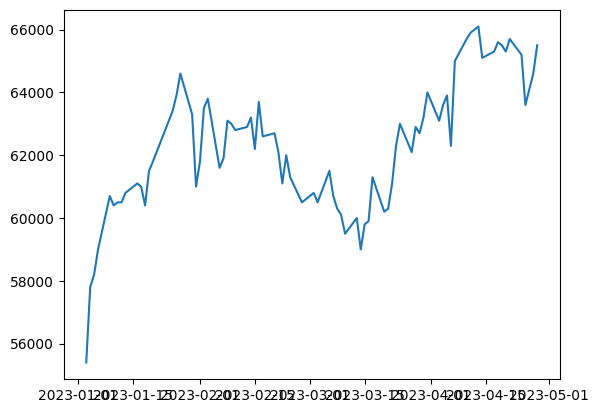

In [96]:
plt.plot(new_sm.index, new_sm['Close'], label="Close")

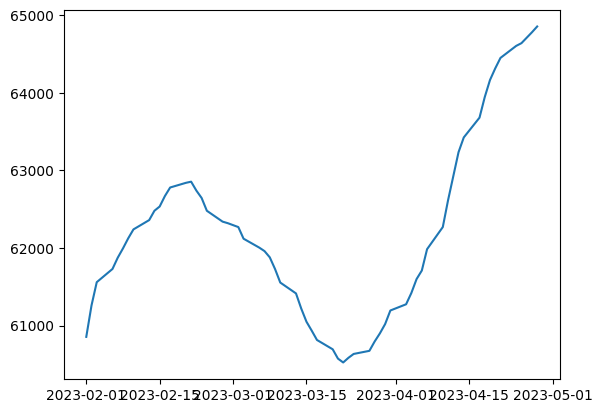

In [97]:
plt.plot(new_sm.index, new_sm['MA20'], label="MA20")

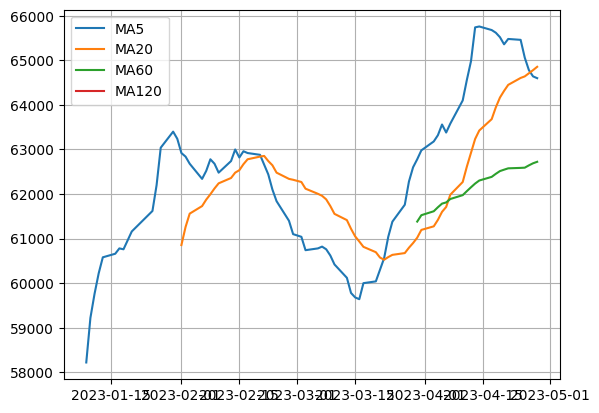

In [98]:
plt.plot(new_sm.index, new_sm['MA5'], label="MA5")
plt.plot(new_sm.index, new_sm['MA20'], label="MA20")
plt.plot(new_sm.index, new_sm['MA60'], label="MA60")
plt.plot(new_sm.index, new_sm['MA120'], label="MA120")

plt.legend(loc='best')
plt.grid()
plt.show()

### (2) 범례설정

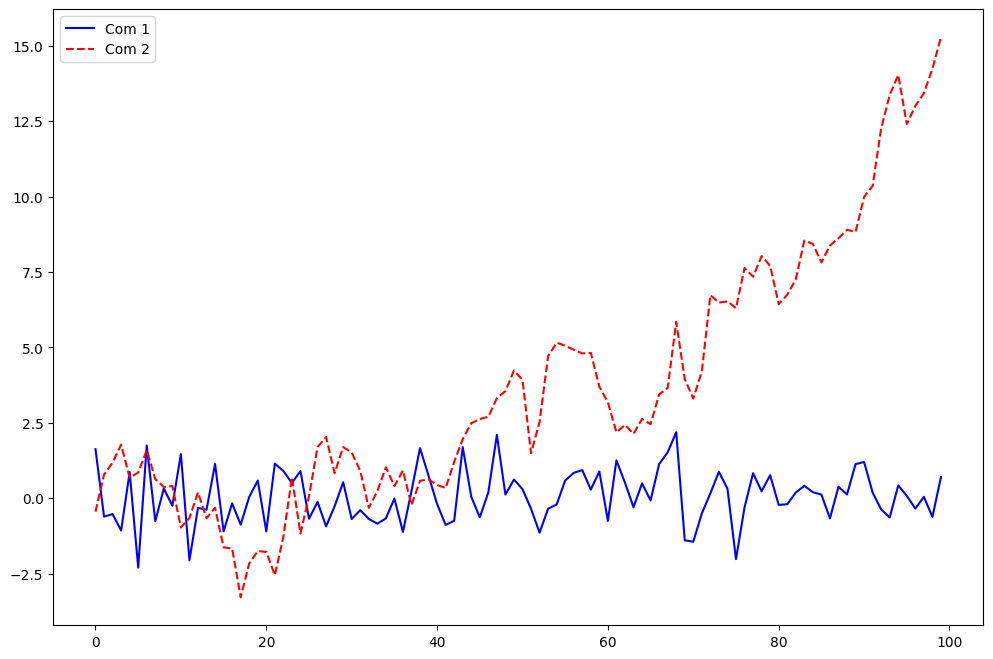

In [99]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
x = np.arange(100)
y1 = np.random.normal(0, 1, 100)
y2 = np.random.normal(0, 1, 100).cumsum()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)

ax.plot(x, y1, 'b-', label='Com 1')
ax.plot(x, y2, 'r--', label='Com 2')
ax.legend()
plt.show()


### (3) 예제완성

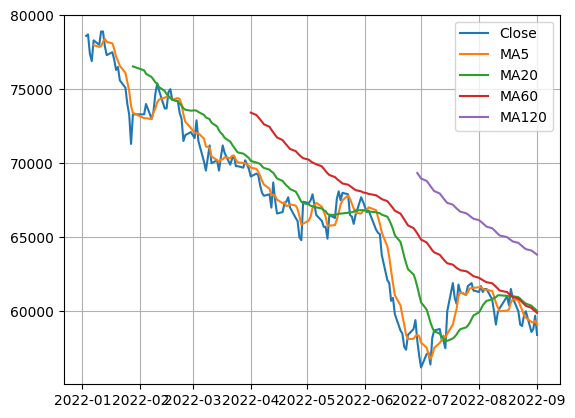

In [100]:
import pandas as pd
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

sm = fdr.DataReader("005930", "2022-01-01", "2022-09-01")
new_sm = sm[sm['Volume']!=0]

ma5 = new_sm['Close'].rolling(window=5).mean()
ma20 = new_sm['Close'].rolling(window=20).mean()
ma60 = new_sm['Close'].rolling(window=60).mean()
ma120 = new_sm['Close'].rolling(window=120).mean()

new_sm.insert(len(new_sm.columns), "MA5", ma5)
new_sm.insert(len(new_sm.columns), "MA20", ma20)
new_sm.insert(len(new_sm.columns), "MA60", ma60)
new_sm.insert(len(new_sm.columns), "MA120", ma120)

plt.plot(new_sm.index, new_sm['Close'], label='Close')
plt.plot(new_sm.index, new_sm['MA5'], label='MA5')
plt.plot(new_sm.index, new_sm['MA20'], label='MA20')
plt.plot(new_sm.index, new_sm['MA60'], label='MA60')
plt.plot(new_sm.index, new_sm['MA120'], label='MA120')

plt.legend(loc="best")
plt.grid()
plt.show()